In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D,MaxPooling2D
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dineshxenova02224","key":"8c072144dd350f37997d370ff2718a9f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d chest_xray



Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/chest_xray/train

In [5]:
import zipfile

# Path to your full dataset ZIP
zip_path = 'chest-xray-pneumonia.zip'

# Directory to extract into
extract_dir = 'chest_xray_full'

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset unzipped to:", extract_dir)


Dataset unzipped to: chest_xray_full


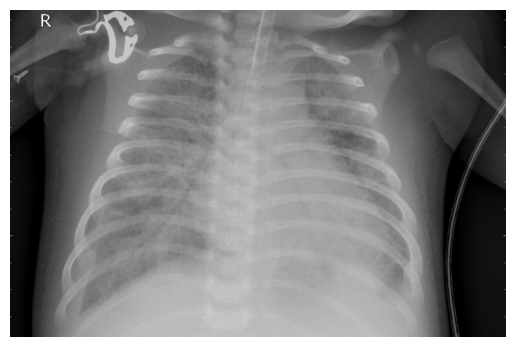

In [6]:
import matplotlib.image as mpimg

img_path = "/content/chest_xray_full/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg"

image = mpimg.imread(img_path)
plt.imshow(image,cmap = 'gray')
plt.axis('off')
plt.show()



In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir ='chest_xray_full/chest_xray'

traindata_image = ImageDataGenerator(
    rescale =1./255,
    shear_range =0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

# train generator

train_generator = traindata_image.flow_from_directory(
    f'{base_dir}/train',
    target_size = (150 ,150),
    batch_size = 32,
    class_mode = 'binary',
    subset ='training'
)

# Validation generator so they can test also to the validation same type
validation_generator = traindata_image.flow_from_directory(
    f'{base_dir}/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32,(3*3),activation ='relu', input_shape =(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3*3),activation ='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3*3),activation ='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compiling the model

model.compile(
    optimizer ='adam',
    loss ='binary_crossentropy',
    metrics = ['accuracy']
)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 131/4173 ━━━━━━━━━━━━━━━━━━━━ 29:36 439ms/step - accuracy: 0.6954 - loss: 0.6703

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4173/4173 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - accuracy: 0.7388 - loss: 0.5688 - val_accuracy: 0.7881 - val_loss: 0.4389
Epoch 2/5
4173/4173 ━━━━━━━━━━━━━━━━━━━━ 67s 16ms/step - accuracy: 0.8268 - loss: 0.3773 - val_accuracy: 0.8677 - val_loss: 0.3259
Epoch 3/5
4173/4173 ━━━━━━━━━━━━━━━━━━━━ 65s 16ms/step - accuracy: 0.8606 - loss: 0.3190 - val_accuracy: 0.8802 - val_loss: 0.2821
Epoch 4/5
4173/4173 ━━━━━━━━━━━━━━━━━━━━ 66s 16ms/step - accuracy: 0.8786 - loss: 0.2712 - val_accuracy: 0.9041 - val_loss: 0.2461
Epoch 5/5
4173/4173 ━━━━━━━━━━━━━━━━━━━━ 65s 16ms/step - accuracy: 0.8937 - loss: 0.2496 - val_accuracy: 0.9012 - val_loss: 0.2649


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    f'{base_dir}/test',
    target_size=(150,150),
    batch_size=1,        # 1 image at a time for easy display
    class_mode='binary',
    shuffle=False         # keep order same for checking
)

Found 624 images belonging to 2 classes.


In [12]:
import numpy as np

# Predict classes for test images
preds = model.predict(test_generator)
pred_classes = (preds > 0.5).astype(int)  # 0 = NORMAL, 1 = PNEUMONIA


624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


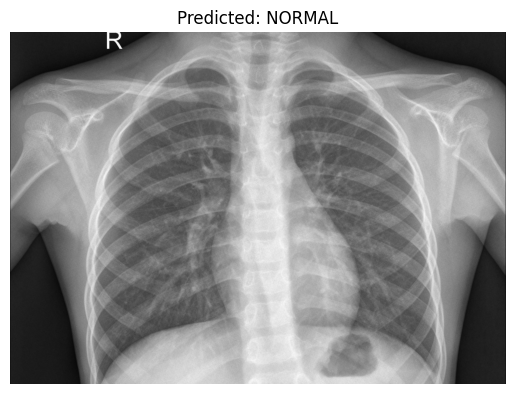

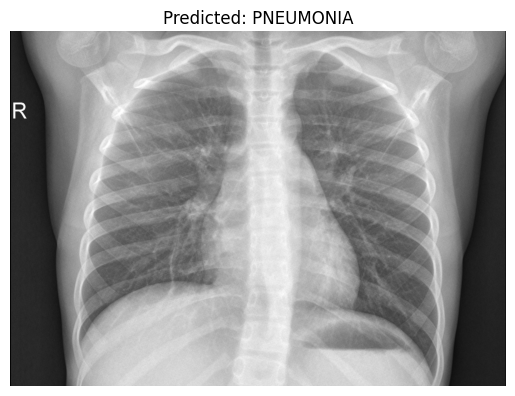

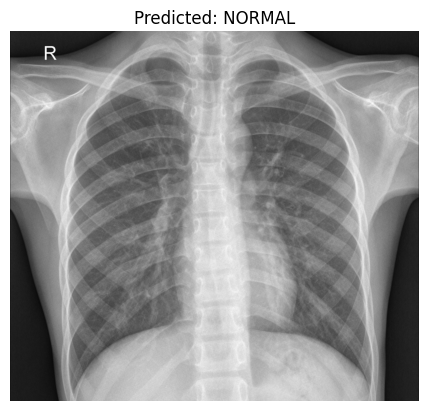

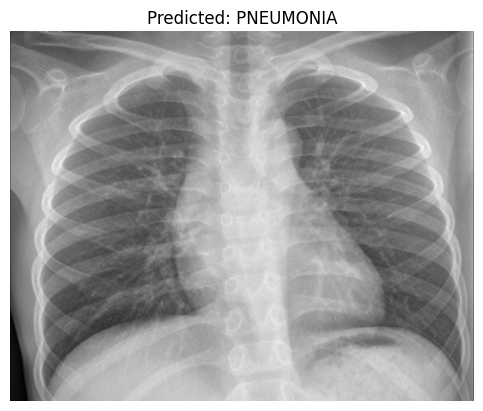

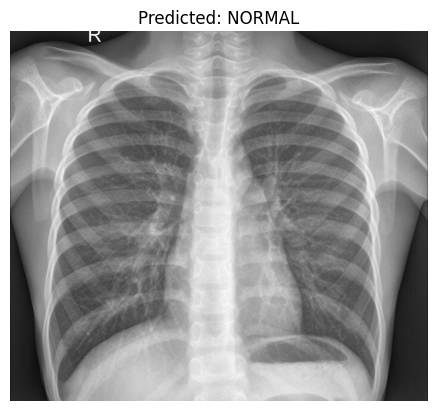

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display first 5 test images with predicted labels
for i in range(5):
    img_path = test_generator.filepaths[i]
    img = mpimg.imread(img_path)

    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {"PNEUMONIA" if pred_classes[i]==1 else "NORMAL"}')
    plt.axis('off')
    plt.show()


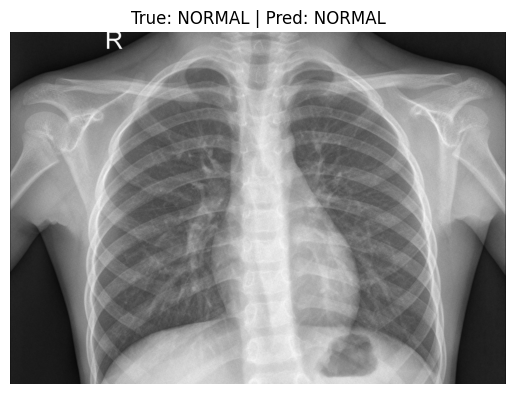

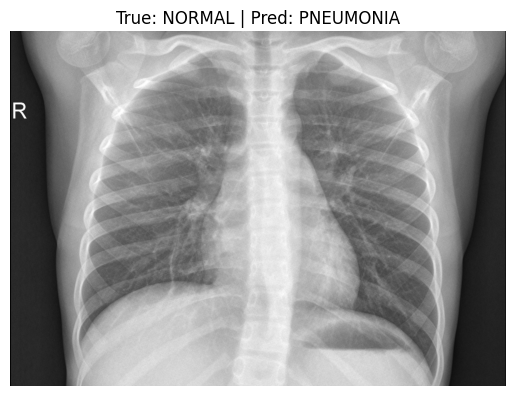

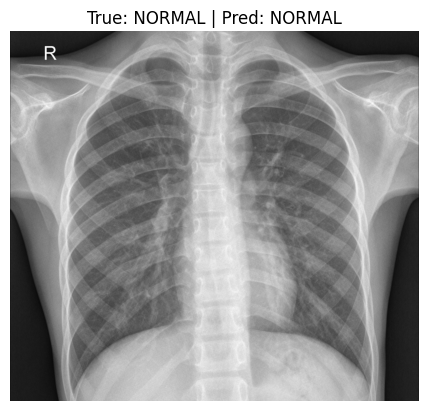

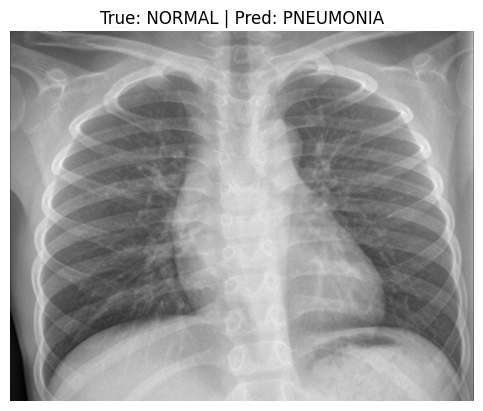

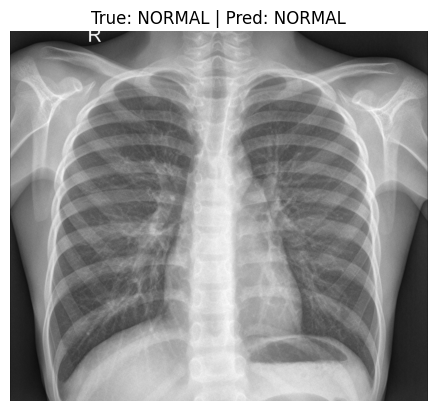

In [14]:
true_classes = test_generator.classes

for i in range(5):
    img_path = test_generator.filepaths[i]
    img = mpimg.imread(img_path)

    plt.imshow(img, cmap='gray')
    plt.title(f'True: {"PNEUMONIA" if true_classes[i]==1 else "NORMAL"} | Pred: {"PNEUMONIA" if pred_classes[i]==1 else "NORMAL"}')
    plt.axis('off')
    plt.show()
